In [2]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


In [3]:
os.chdir('UTKFace')

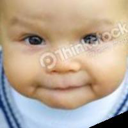

In [4]:
im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

In [5]:
onlyfiles = os.listdir()

In [6]:
len(onlyfiles)

23708

In [7]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

We can split the data into Classes

1. Children (1-14) CLASS 0
2. Youth (14-25) CLASS 1
3. ADULTS (25-40) CLASS 2
4. Middle age (40-60) CLASS 3
5. Very Old (>60) CLASS 4

In [8]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

CONVERT IMAGES TO VECTORS

In [9]:
import imageio

X_data =[]
for file in onlyfiles:
    face = imageio.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)

In [10]:
X = np.squeeze(X_data)

In [11]:
X.shape

(23708, 32, 32, 3)

In [12]:
X = X.astype('float32')
X /= 255

In [13]:
X.shape

(23708, 32, 32, 3)

In [14]:
classes[:10]

[0, 1, 2, 4, 2, 4, 2, 4, 0, 4]

In [15]:
categorical_labels = to_categorical(classes, num_classes=5)

In [16]:
categorical_labels[:10]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [18]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [19]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
history = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=25,
         validation_data=(x_valid, y_valid),)

Epoch 1/25
235/235 [==============================] - 27s 113ms/step - loss: 1.4179 - accuracy: 0.4102 - val_loss: 1.1699 - val_accuracy: 0.5031
Epoch 2/25
235/235 [==============================] - 26s 112ms/step - loss: 1.1566 - accuracy: 0.5094 - val_loss: 1.0656 - val_accuracy: 0.5427
Epoch 3/25
235/235 [==============================] - 26s 112ms/step - loss: 1.0737 - accuracy: 0.5379 - val_loss: 1.0091 - val_accuracy: 0.5666
Epoch 4/25
235/235 [==============================] - 26s 111ms/step - loss: 1.0332 - accuracy: 0.5585 - val_loss: 0.9738 - val_accuracy: 0.5814
Epoch 5/25
235/235 [==============================] - 26s 111ms/step - loss: 1.0043 - accuracy: 0.5690 - val_loss: 0.9814 - val_accuracy: 0.5789
Epoch 6/25
235/235 [==============================] - 26s 111ms/step - loss: 0.9834 - accuracy: 0.5752 - val_loss: 0.9407 - val_accuracy: 0.5910
Epoch 7/25
235/235 [==============================] - 26s 112ms/step - loss: 0.9631 - accuracy: 0.5847 - val_loss: 0.9306 - val_ac

In [ ]:
model.save('detector.h5', history)

In [26]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6641176342964172


In [27]:
labels =["CHILD",  # index 0
        "YOUTH",      # index 1
        "ADULT",     # index 2 
        "MIDDLEAGE",        # index 3 
        "OLD",         # index 4
        ]

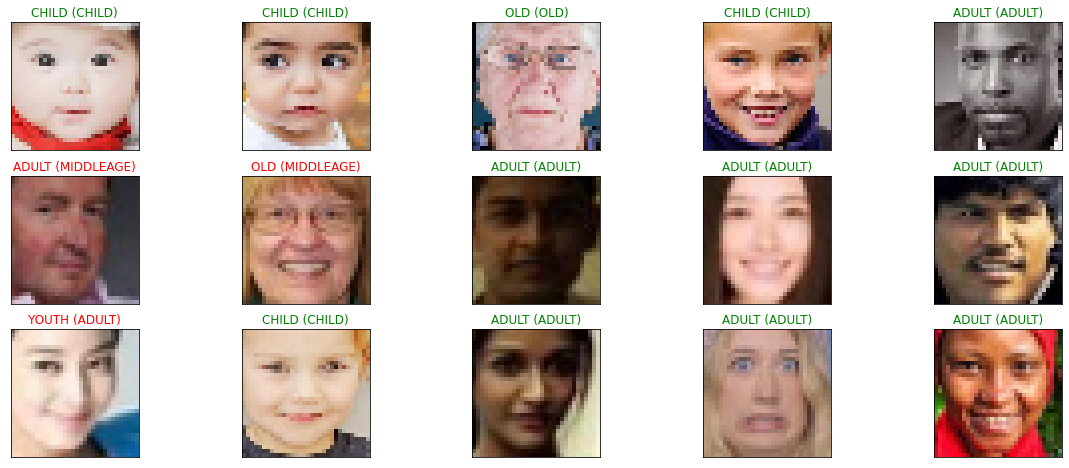

In [28]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
mymodel=load_model('detector.h5')

face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while cap.isOpened():
    success, img=cap.read()
    
    face=face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)
    
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg', face_img)
        
        test_image = image.load_img('temp.jpg', target_size = (150,150,3))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        
        
        pred = mymodel.predict(test_image)[0][0]
        
        if pred==1:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.rectangle(img, (x, y-40), (x+w, y), (0,0,255), -1)
            cv2.putText(img, "NO MASK", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)    
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0),2)
            cv2.rectangle(img, (x, y-40), (x+w, y), (0,255,0), -1)
            cv2.putText(img, "MASK", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
        
    cv2.imshow('img', img)
    
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()